**Face Recognition- Computer Vision**

**Data Description:**

Aligned Face Dataset from Pinterest. 
This dataset contains 10.770 images for 100 people. 
All images are taken from 'Pinterest' and aligned using dlib library.

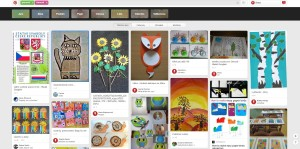

**Objective:**

Build a face identification model to recognize faces.

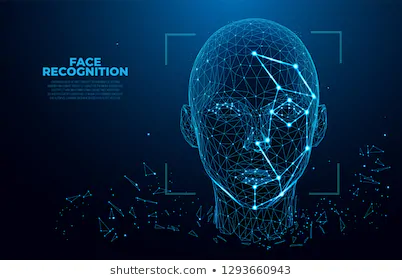


In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

**Mount Google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Changing to Project path**

In [0]:
project_path = "/content/drive/My Drive/Face Recognition/"

**1. Load the dataset and create the metadata**

**Extract the zip file**

In [0]:
from zipfile import ZipFile

with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

**Load metadata function**

In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [6]:
metadata.shape

(10770,)

**Load Image function**

In [0]:
import matplotlib.pyplot as plt
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    plt.imshow(img)
    return img[...,::-1]

**2. Check some samples of metadata**

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

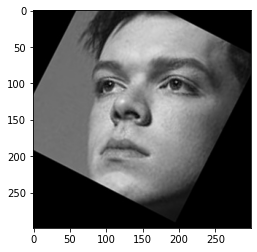

In [8]:
 load_image(metadata[100].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

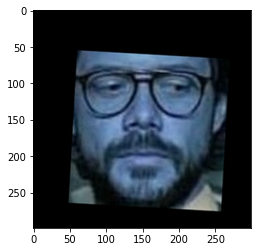

In [9]:
load_image(metadata[1302].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

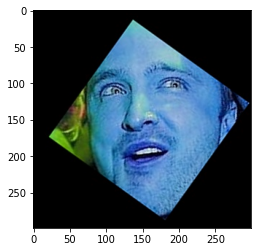

In [10]:
load_image(metadata[9799].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

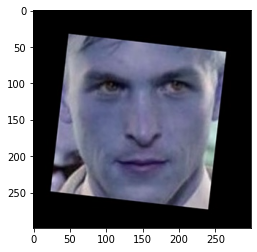

In [11]:
load_image(metadata[9990].image_path())

**3. Load the pre-trained model and weights**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [13]:
# Load pretrained model and weights
model = vgg_face()
model.load_weights('/content/drive/My Drive/Face Recognition/Weights/vgg_face_weights.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [16]:
vgg_face_descriptor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

**4. Generate Embedding vectors for each face in the dataset**

(224, 224, 3)
(2622,)


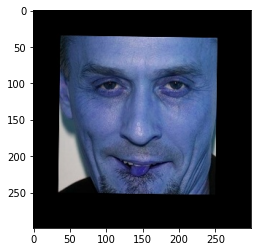

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

**Generate embeddings for all images**

In [0]:
import PIL
from PIL import Image

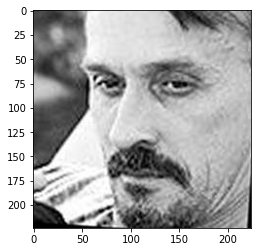

In [19]:
embeddings = np.zeros((metadata.shape[0],2622))

for i, m in enumerate(metadata):
  img = load_image(m.image_path())
  basewidth = 224
img = Image.open(metadata[5].image_path())
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
jc_orig = img.resize((224, 224), PIL.Image.ANTIALIAS)
jc_orig.save(m.image_path())
jc_orig  = load_image(m.image_path())
  #img = align_image(img)
  # scale RGB values to interval [0,1]
img = jc_orig
  # obtain embedding vector for image
embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

**5. Build distance metrics for identifying the distance between two given images**

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [0]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8, 3))
    plt.suptitle('Distance = {0}'.format(distance(embedding_vector[idx1], embedding_vector[idx2])))
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

**Plot images and get distance between the pairs given below
2, 3 and 2, 180
30, 31 and 30, 100
70, 72 and 70, 115**

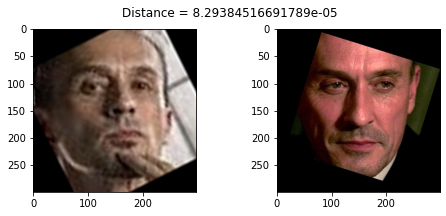

In [22]:
show_pair(2,3)

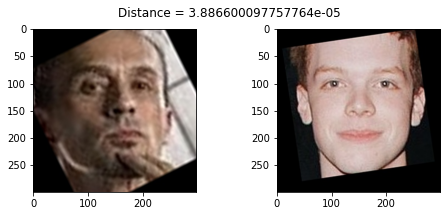

In [23]:
show_pair(2,180)

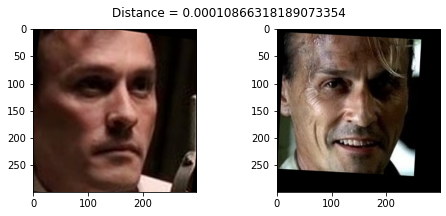

In [24]:
show_pair(30,31)

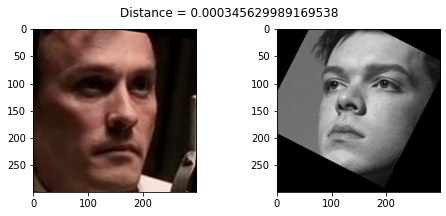

In [25]:
show_pair(30,100)

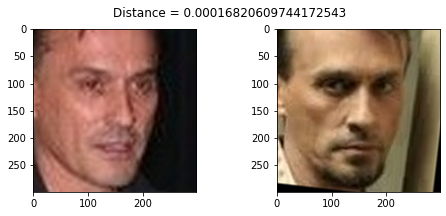

In [26]:
show_pair(70, 72)

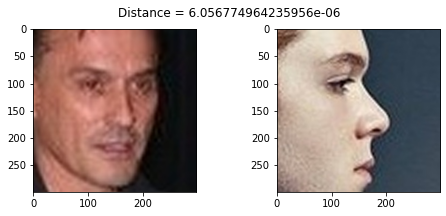

In [27]:
show_pair(70, 115)

In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

LabelEncoder()

In [0]:
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [0]:
#  train examples - 75% of the dataset
X_train = embeddings[train_idx]
# test examples - 25% of the dataset 
X_test = embeddings[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

In [32]:
X_train.shape, X_test.shape

((9573, 2622), (1197, 2622))

In [33]:
y_train.shape, y_test.shape

((9573,), (1197,))

In [0]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**6.Use PCA for dimensionality reduction**

In [0]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [38]:
Xscaled = zscore(train_idx)
Xscaled

array([-2.82798404,  0.35360878,  0.35360878, ...,  0.35360878,
        0.35360878,  0.35360878])

In [39]:
## Covariance matrix
covMatrix = np.cov(Xscaled,rowvar=False)
print(covMatrix)

1.0000928591327016


In [40]:
pca= PCA(n_components=1)
pca.fit(Xscaled.reshape(-1,1))

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Eigen Values**

In [41]:
print(pca.explained_variance_)

[1.00009286]


**Eigen Vectors**

In [42]:
print(pca.components_)

[[-1.]]


**Percentage of variation explained by each eigen vector**

In [43]:
print(pca.explained_variance_ratio_)

[1.]


***PCA has no impact to reduce dimensions in this case***

**7. Build SVM classifier to map each image to its right person**

In [0]:
from sklearn.svm import SVC

In [0]:
svm = SVC(C=0.05, kernel='linear')

In [48]:
svm.fit(X_train, y_train)

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**8. Predict using the SVM model**

In [0]:
y_pred = svm.predict(X_test)

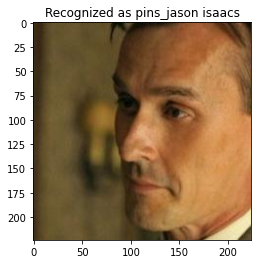

In [50]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
img = Image.open(metadata[test_idx][example_idx].image_path())
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
jc_orig = img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
jc_orig.save(m.image_path())
jc_orig  = load_image(m.image_path())
#img2 = align_image(jc_orig )
# scale RGB values to interval [0,1]
#img2 = (img2 / 255.).astype(np.float32)
img2 = jc_orig
img2 = cv2.resize(img2, dsize = (224,224))
# obtain embedding vector for image
embedded = vgg_face_descriptor.predict(np.expand_dims(img2, axis=0))
     
X_test = embedded
example_prediction=svm.predict(X_test)
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(img2)
plt.title(f'Recognized as {example_identity}');  